<a href="https://colab.research.google.com/github/DaniilAszn/Sci-tech_methods_course/blob/main/Dimensionless_complexes_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы научно-технического прогнозирования

Тема работы: Анализ набора данных легковых автомобилей с помощью методов теории безразмерных комплексов

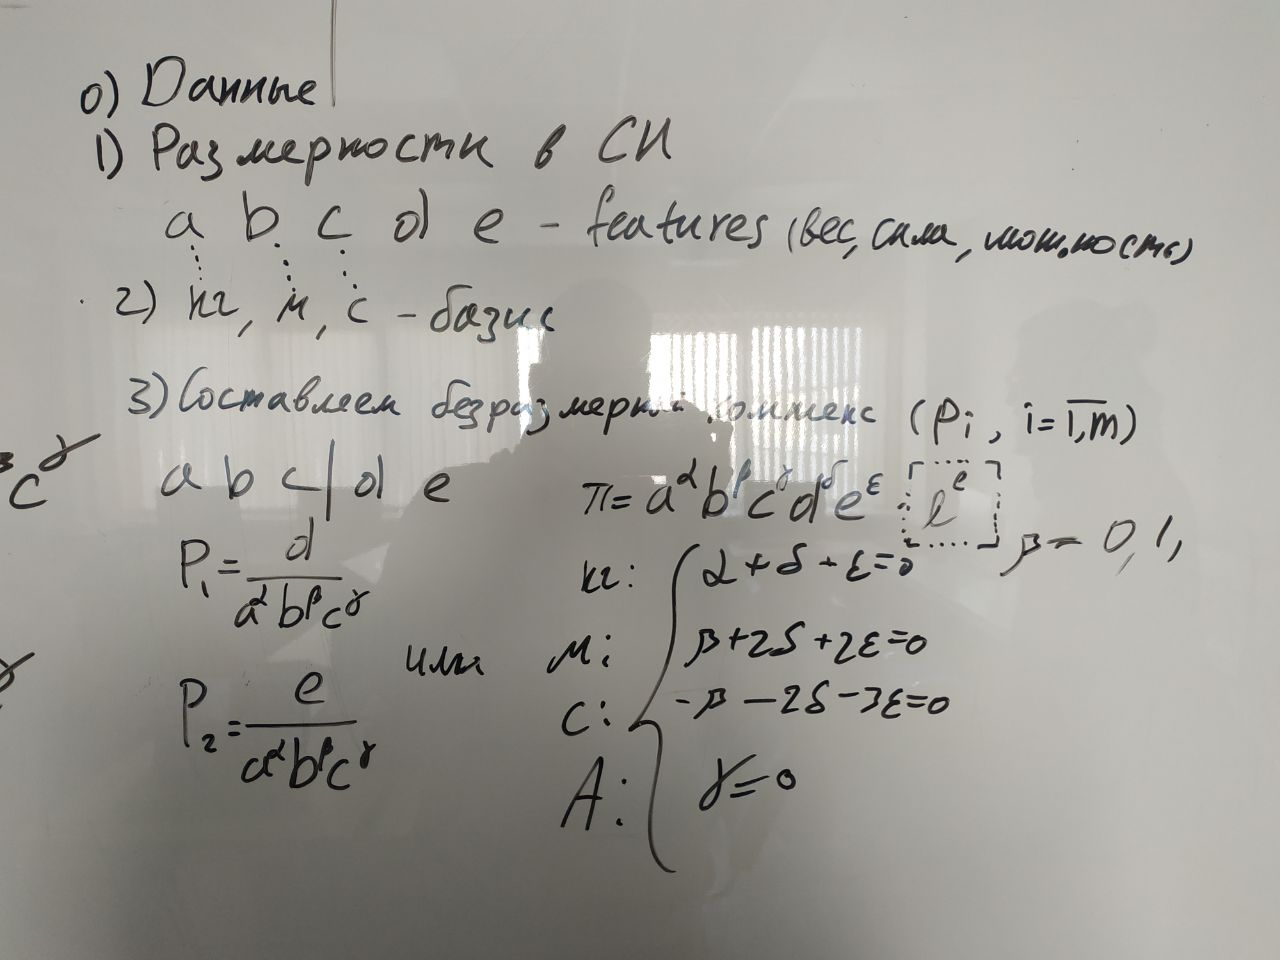

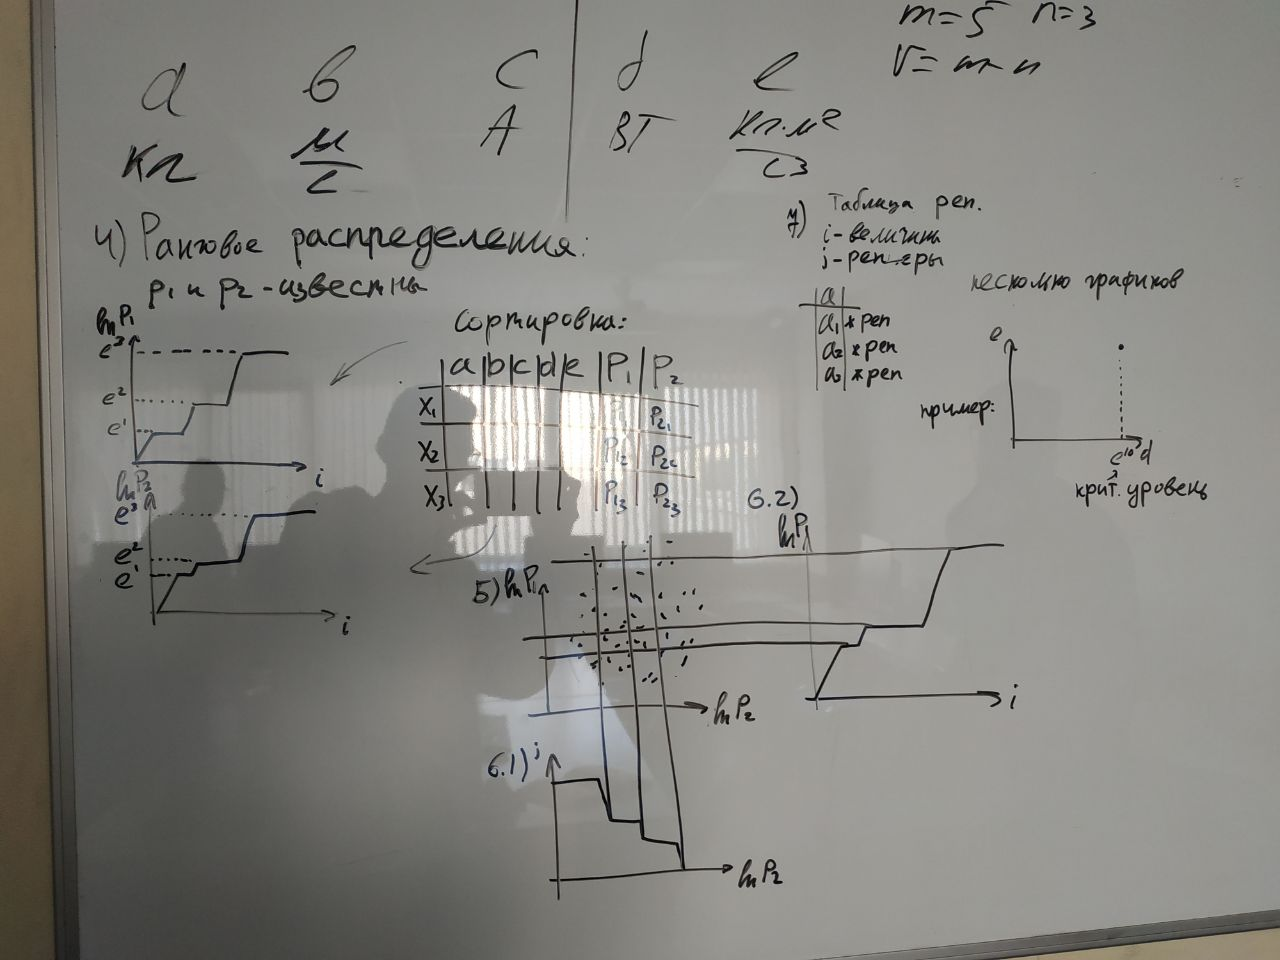

## Этап 0: Данные.

In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.style.use('ggplot')

In [2]:
np.random.seed(0)
data = {
    'Масса, кг': np.random.uniform(1000, 2000, 225),
    'Длина, м': np.random.uniform(3, 5, 225),
    'Ширина, м': np.random.uniform(1.5, 2.5, 225),
    'Высота, м': np.random.uniform(1, 2, 225),
    'Мощность двигателя, Вт': np.random.uniform(50000, 300000, 225)
}

df = pd.DataFrame(data)

## Этап 1: Размерности в СИ.

In [3]:
df.head()

,"Масса, кг","Длина, м","Ширина, м","Высота, м","Мощность двигателя, Вт"
0,1548.813504,4.905583,1.796556,1.653421,252709.653782
1,1715.189366,4.374977,2.492011,1.726342,137047.985687
2,1602.763376,3.431015,1.749420,1.536923,102863.698946
3,1544.883183,4.894741,1.605906,1.110477,64845.797001
4,1423.654799,4.461712,2.450953,1.405036,269006.711980


In [4]:
df.describe()

,"Масса, кг","Длина, м","Ширина, м","Высота, м","Мощность двигателя, Вт"
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,1498.247525,3.979297,2.006041,1.490552,172535.968441
std,284.856442,0.600160,0.291283,0.286654,75637.283567
min,1004.695476,3.022855,1.502703,1.000546,50166.054648
25%,1253.291603,3.480041,1.772437,1.250398,106840.612269
50%,1535.632803,3.916278,1.977647,1.458503,171241.411290
75%,1715.189366,4.530651,2.239884,1.737279,239746.138688
max,1998.847007,4.980690,2.499278,1.991890,299952.144529


## Этап 2: Составление безразмерных комплексов.

### Введём небольшие переобозначения для удобства:
1. Масса ($кг$) - a
2. Длина ($м$) - b
3. Ширина ($м$) - с
4. Высота ($м$) - d
5. Мощность двигателя ($Вт = \frac{кг\cdotм^2}{c^3}$) - e

### Общий вид позинома:

$\pi = a^{\alpha} \cdot b^{\beta} \cdot c^{\gamma} \cdot d^{\delta} \cdot e^{\epsilon}$

### Составление СЛАУ:

$[кг]: \alpha + \epsilon = 0$

$[м]: \beta + \gamma + \delta + 2\epsilon = 0$

$[с]:  -3\epsilon = 0$

### Решение СЛАУ:

$$
\begin{matrix}
\alpha =  0 \\
\beta = -\gamma -\delta = -C_1 - C_2 \\
\gamma = C_1 \\
\delta = C_2 \\
\epsilon = 0 \\
\end{matrix}
$$

$Пусть$
$\gamma = \delta = 1:$

$$
\begin{matrix}
\alpha =  0 \\
\beta = -2\\
\gamma = 1 \\
\delta = 1 \\
\epsilon = 0 \\
\end{matrix}
$$

### Подтверждение безразмерности:

$\pi = a^{0} \cdot b^{-2} \cdot c^{1} \cdot d^{1} \cdot e^{0} = \frac{1}{b^2} \cdot c \cdot d = \frac{1}{м^2} \cdot м \cdot м = 1$

### Безразмерные комплексы:

$p_1 = \frac{c}{a^{\alpha} \cdot b^{\beta} \cdot e^{\epsilon}} = \frac{c}{\frac{1}{b^2}} = b^2c$

$p_2 = \frac{d}{a^{\alpha} \cdot b^{\beta} \cdot e^{\epsilon}} = \frac{d}{\frac{1}{b^2}} = b^2d$

## Этап 3: Ранговые распределения.

In [5]:
p_1 = list((df['Длина, м']) ** 2 * (df['Ширина, м']))
p_2 = list((df['Длина, м']) ** 2 * (df['Высота, м']))

In [6]:
ln_p_1 = [m.log(p_i) for p_i in p_1]
ln_p_2 = [m.log(p_i) for p_i in p_2]

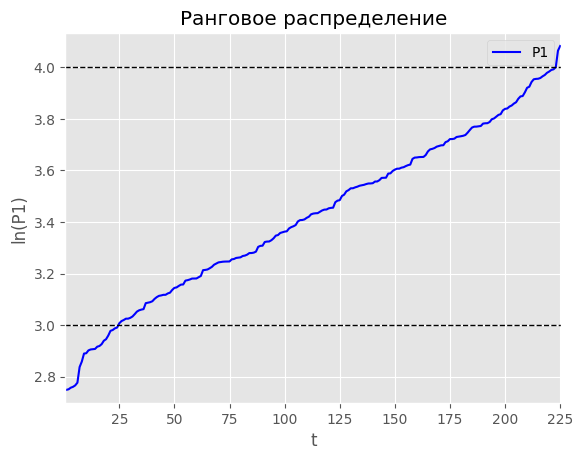

In [8]:
t = [i for i in range(1, len(ln_p_1) + 1)]

plt.plot(t, sorted(ln_p_1), color='blue', label='P1')
for i in range(1, 5):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_1) - 0.05, max(ln_p_1) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P1)')
plt.title('Ранговое распределение')
plt.legend()

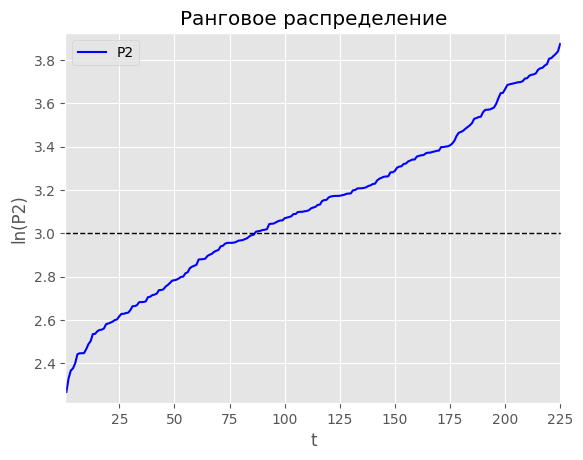

In [9]:
t = [i for i in range(1, len(ln_p_2) + 1)]

plt.plot(t, sorted(ln_p_2), color='blue', label='P2')
for i in range(1, 5):
    plt.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.05, max(ln_p_2) + 0.05)
plt.xlabel('t')
plt.ylabel('ln(P2)')
plt.title('Ранговое распределение')
plt.legend()

## Этап 4: Точечная диаграмма. Реализация классификатора.

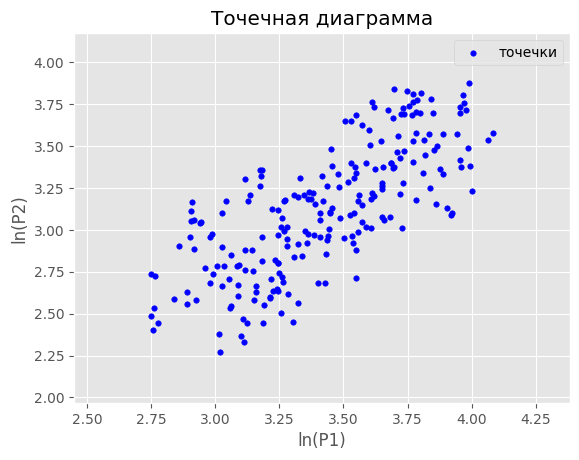

In [14]:
plt.scatter(ln_p_1, ln_p_2, color='blue', s=15, label='точечки')
plt.xlim(min(ln_p_1) - 0.3, max(ln_p_1) + 0.3)
plt.ylim(min(ln_p_2) - 0.3, max(ln_p_2) + 0.3)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P2)')
plt.title('Точечная диаграмма')
plt.legend()

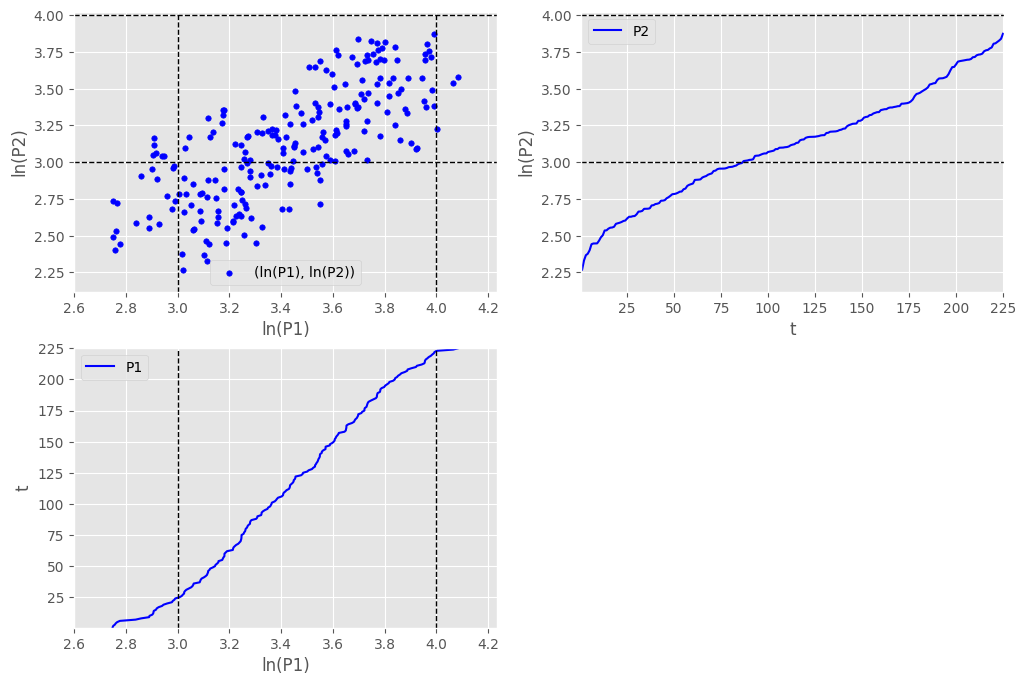

In [15]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.arange(0, 5, 0.2))
ax1.scatter(ln_p_1, ln_p_2, color='blue', s=15, label='(ln(P1), ln(P2))')
for i in range(1, 5):
    ax1.axhline(i, color='black', linestyle='--', lw=1)
    ax1.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('ln(P1)')
plt.ylabel('ln(P2)')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot([i for i in range(1, len(ln_p_2) + 1)], sorted(ln_p_2), color='blue', label='P2')
for i in range(1, 5):
    ax2.axhline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(t) - 0.5, max(t) + 0.5)
plt.ylim(min(ln_p_2) - 0.15, max(ln_p_2) + 0.15)
plt.xlabel('t')
plt.ylabel('ln(P2)')
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(sorted(ln_p_1), [i for i in range(1, len(ln_p_1) + 1)], color='blue', label='P1')
for i in range(1, 5):
    ax3.axvline(i, color='black', linestyle='--', lw=1)
plt.xlim(min(ln_p_1) - 0.15, max(ln_p_1) + 0.15)
plt.ylim(min(t) - 0.5, max(t) + 0.5)
plt.xlabel('ln(P1)')
plt.ylabel('t')
ax3.legend()

## Этап 5: Критический уровень

Реперная таблица:
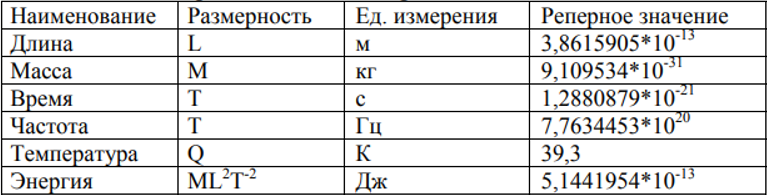

In [23]:
'''
c - ширина
d - высота
'''
c = df['Ширина, м'] * (3.8615905 * 10 ** -13)
d = df['Высота, м'] * (3.8615905 * 10 ** -13)

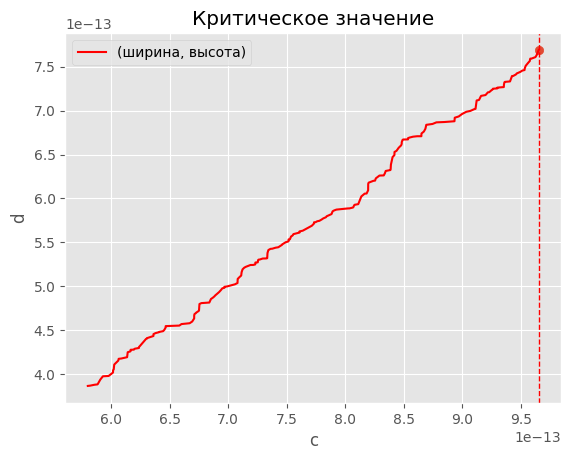

In [39]:
plt.plot(sorted(c), sorted(d), color='red', label='(ширина, высота)')
plt.scatter(max(c), max(d))
plt.axvline(max(c), color='red', linestyle='--', lw=1)
plt.xlabel('c')
plt.ylabel('d')
plt.title('Критическое значение')
plt.legend()